In [1]:
#load Modules

import pickle
import pandas as pd
import numpy as np
import cv2
import scipy
from scipy import ndimage
from static.dnn_app_utils import *

## Load Model

In [2]:
parameters = pickle.load(open("model.pickle", "rb"))
type(parameters)

dict

## Load Data

In [3]:
#read training data
df = pd.read_hdf('data/processed/train.h5', key='train', mode='r')
train_images = np.asarray([df['image']], dtype=int)[0]
train_y = np.array(df['label']).reshape((1, len(df['label'])))
print(train_images.shape, train_y.shape)
#read testing data
df = pd.read_hdf('data/processed/test.h5', key='test', mode='r')
test_images = np.asarray([df['image']], dtype=int)[0]
test_y = np.array(df['label']).reshape((1, len(df['label'])))
print(test_images.shape, test_y.shape)

(697, 64, 64, 3) (1, 697)
(300, 64, 64, 3) (1, 300)


In [4]:
# Reshape the training and test examples 
train_x_flatten = train_images.reshape(train_images.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_images.reshape(test_images.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 697)
test_x's shape: (12288, 300)


In [5]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [6]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9928263988522239


In [7]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.5566666666666666


## Results Analysis

First, let's take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images. 

In [8]:
def print_mislabeled_images(classes, X, y, p, limit=5):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (30.0, 30.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(limit):
        index = mislabeled_indices[1][i]
        plt.subplot(2, limit, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])] + " \n Class: " + classes[y[0,index]])

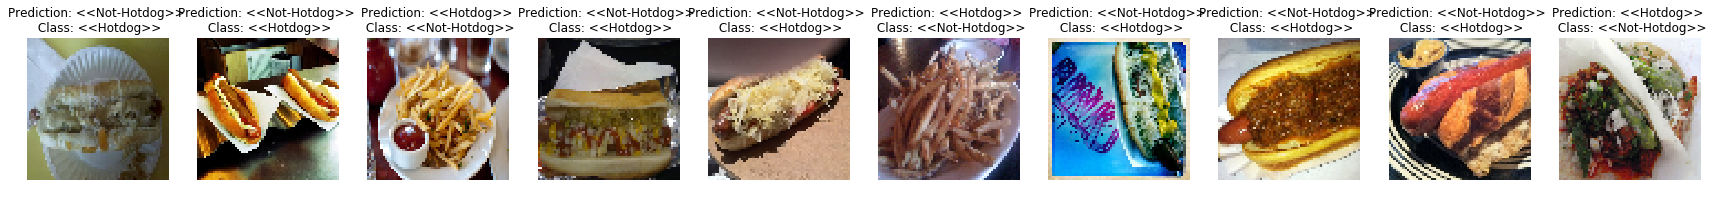

In [9]:
classes = ["<<Not-Hotdog>>", "<<Hotdog>>"]
print_mislabeled_images(classes, test_x, test_y, pred_test, 10)

## Test with your own image

Here, you can use your own image and see the output of your model. To do that:
    1. Add your image to this Jupyter Notebook's directory, in the "images" folder
    2. Change your image's name in the following code
    3. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

In [10]:
my_image = "my_image.jpg"    # change this to the name of your image file 
my_label_y = [0]             # the true class of your image (1 -> hotdog, 0 -> non-hotdog)
num_px = 64
fname = "static/" + my_image

Accuracy: 0.0
y = 1.0. It's a <<Hotdog>> picture.


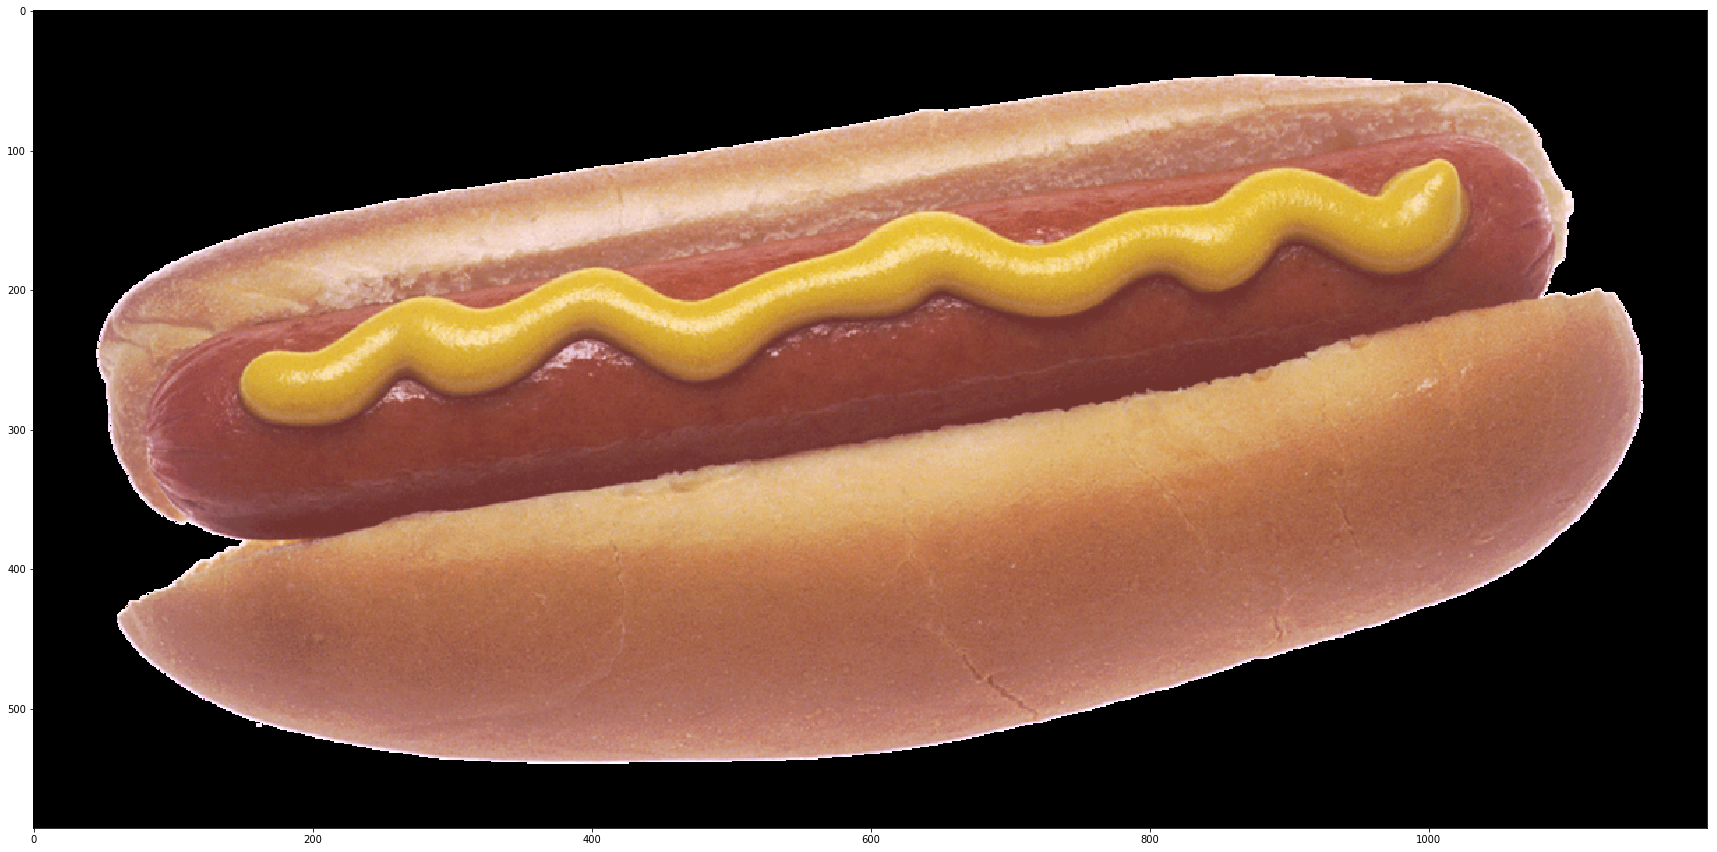

In [12]:
#preprocess the given input image
img = cv2.imread(fname)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_ = cv2.resize(img, (64, 64), interpolation=cv2.INTER_CUBIC)
img_flatten = img_.reshape((64*64*3, 1))   # The "-1" makes reshape flatten the remaining dimensions

# Standardize data to have feature values between 0 and 1.
img_flatten = img_flatten/255.
#predict
model_prediction = predict(img_flatten, my_label_y, parameters)[0][0]
plt.imshow(img)
print ("y = " + str(model_prediction) + ". It's a " + classes[int(model_prediction)] +  " picture.")